# Understanding the dataset

Import Libraries

In [4]:
%pip install numpy
%pip install pandas
%pip install tensorflow
%pip install matplotlib
%pip install seaborn
%pip install sklearn
%pip install imblearn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.ensemble import GradientBoostingClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv('creditcard.csv')

# Change the columm Class to Fraud
df.rename(columns={'Class': 'Fraud'}, inplace=True)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Fraud
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
# Check for Null Values
df.isnull().sum().max()

0

In [23]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Fraud'],
      dtype='object')

In [24]:
# Check class distribution
print("\nClass Distribution:\n", df['Fraud'].value_counts())

# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')


Class Distribution:
 Fraud
0    284315
1       492
Name: count, dtype: int64
No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


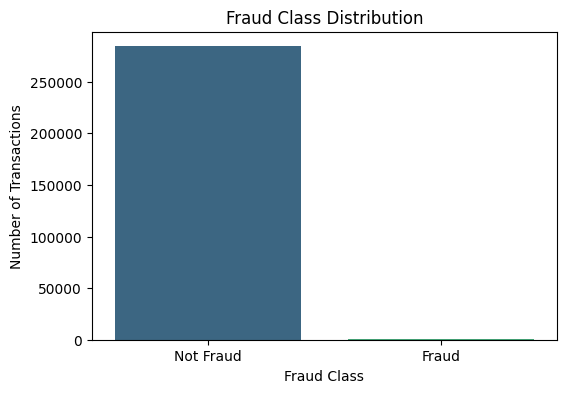

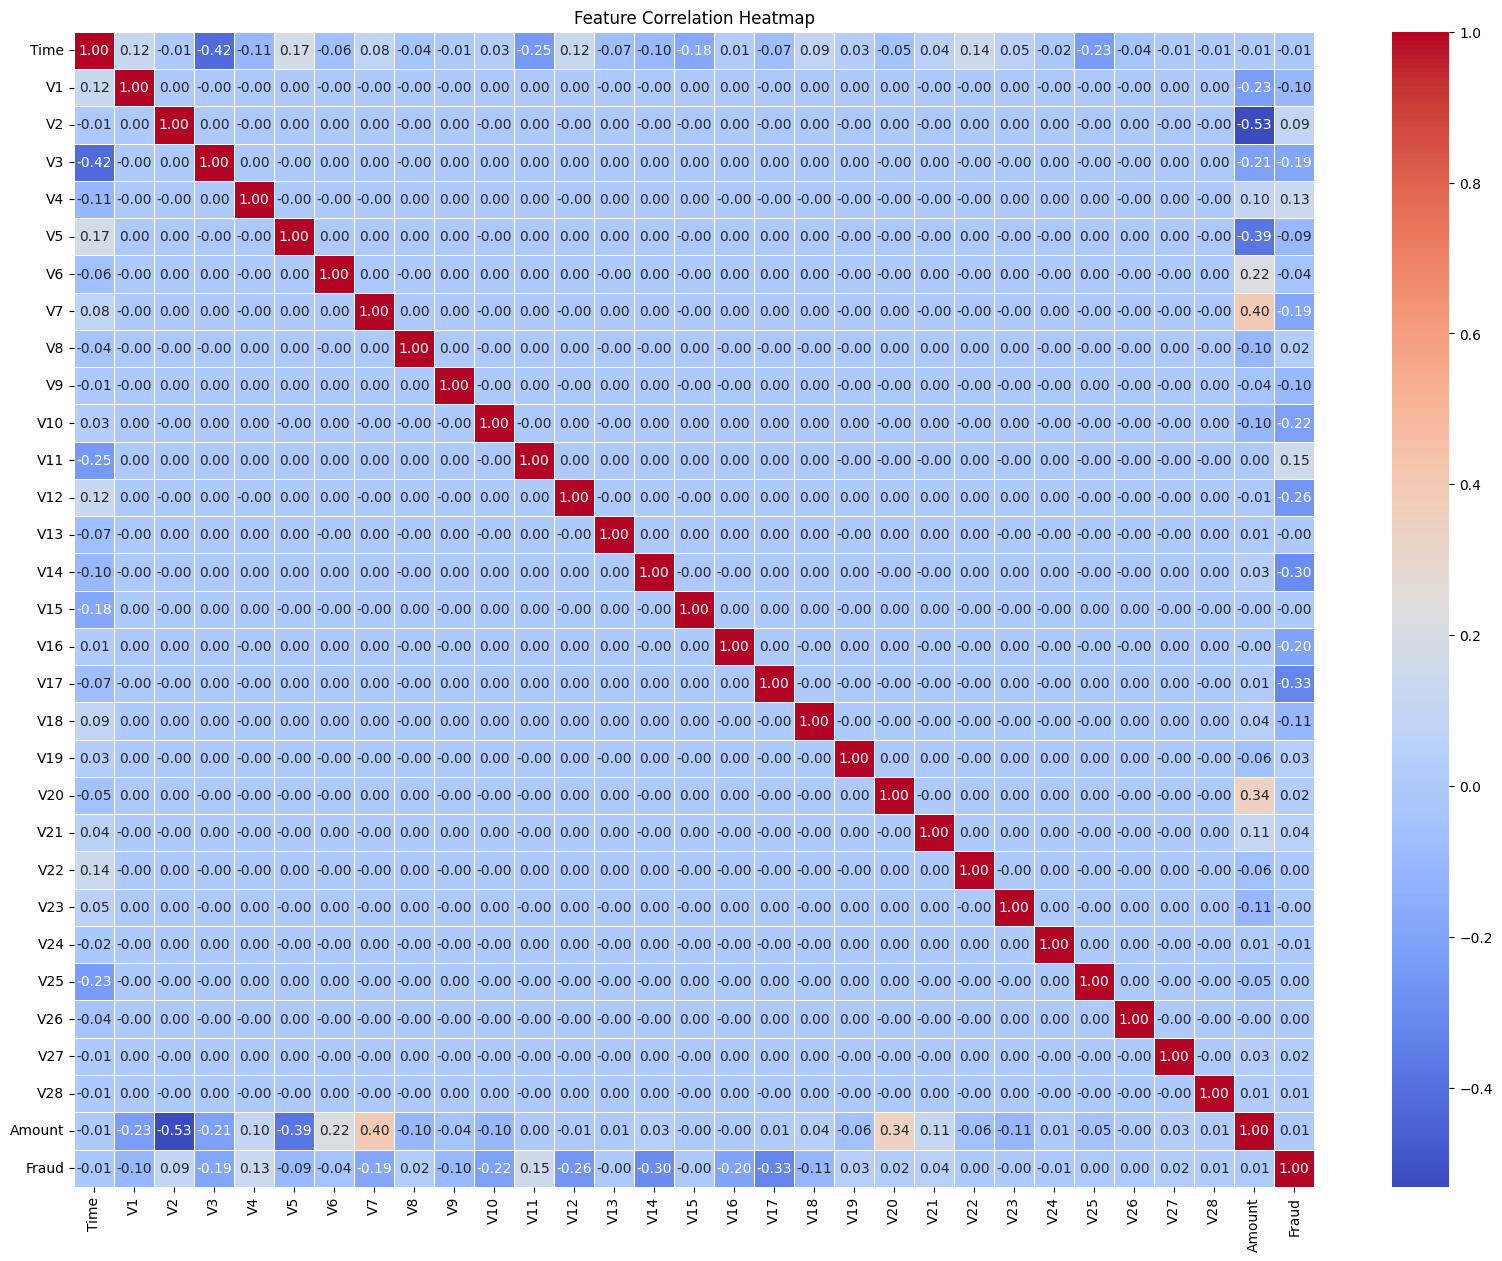

In [25]:
# Fraud Class Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=df["Fraud"].value_counts().index,
            y=df["Fraud"].value_counts().values,
            hue=df["Fraud"].value_counts().index,
            palette="viridis",
            legend=False)

plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.ylabel("Number of Transactions")
plt.xlabel("Fraud Class")
plt.title("Fraud Class Distribution")
plt.show()

# Select only numeric columns for correlation computation
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Feature Correlation Heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Data Preprocessing

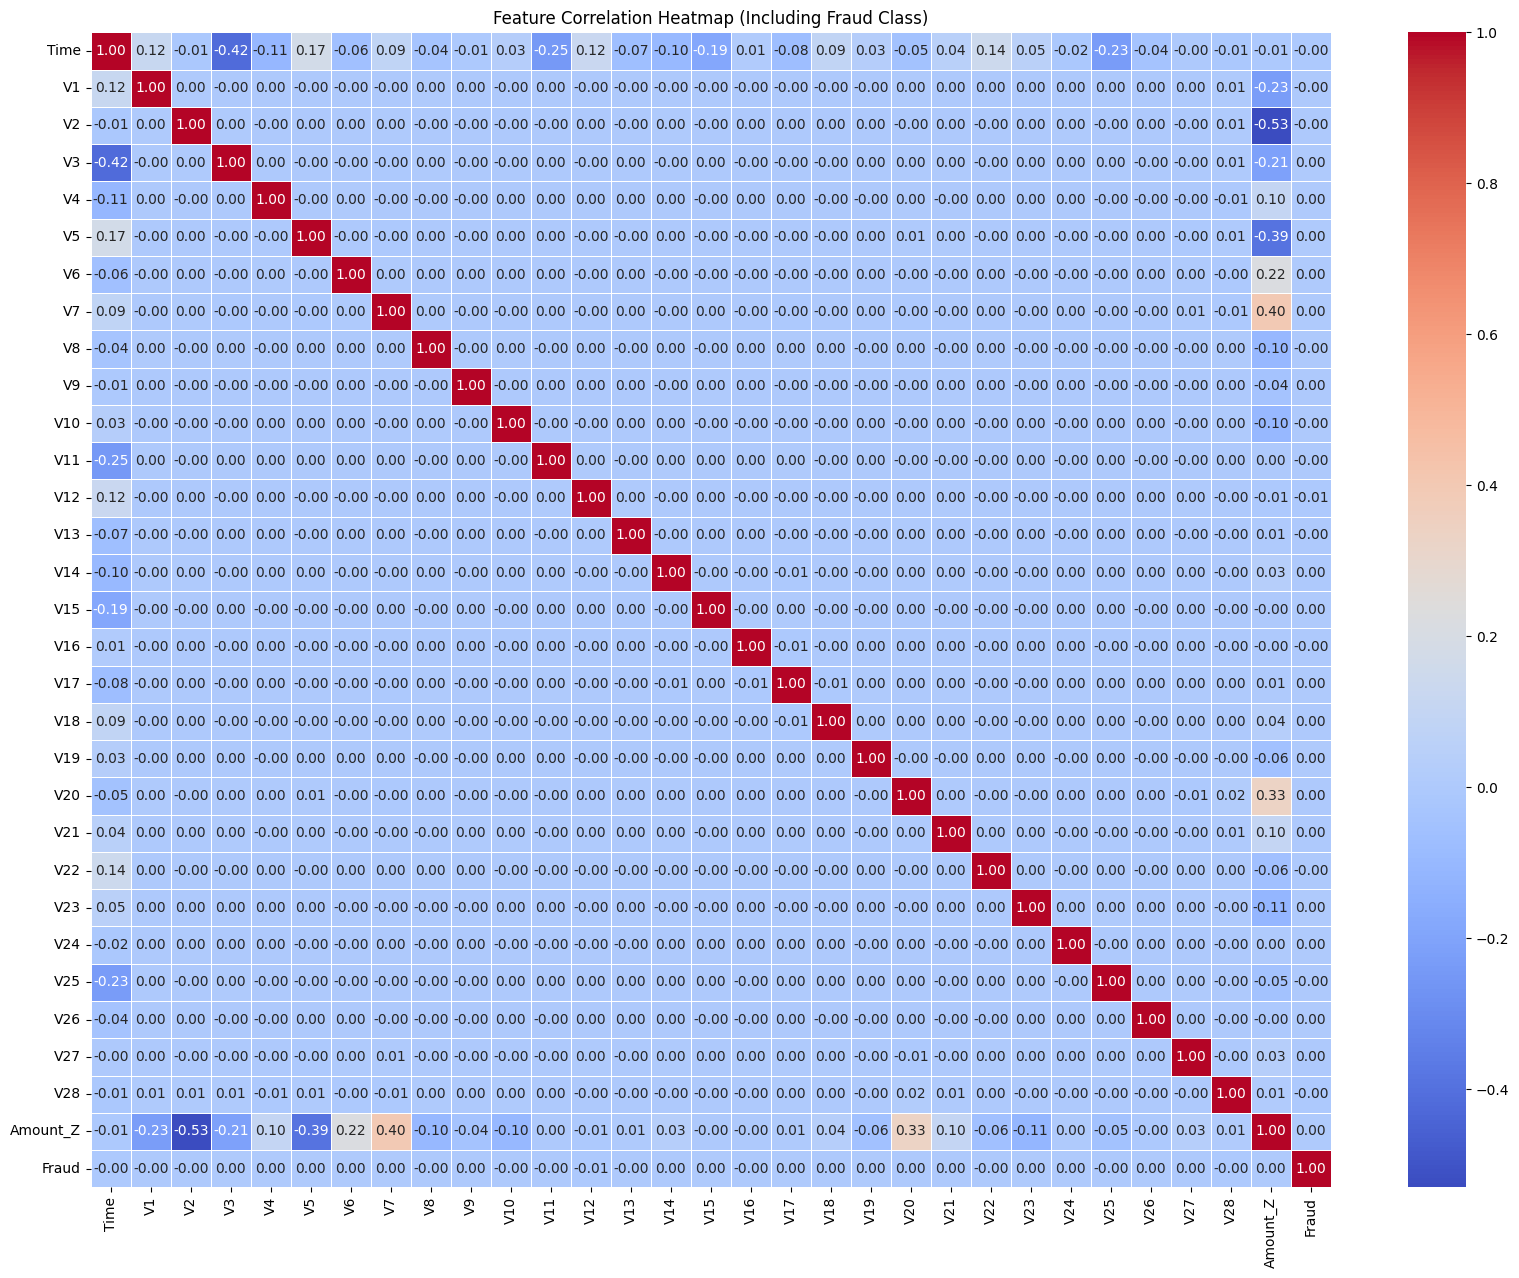

In [26]:
# Feature Engineering - Alternative Features
# 1. Standardize Transaction Amount
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()         # Swap scaler to emphasize higher amounts
df["Amount_Z"] = scaler.fit_transform(df[["Amount"]])


df.drop(columns=["Amount"], inplace=True)

# Separate features and target variable
df = df.dropna(subset=['Fraud'])  # Remove rows where 'Fraud' is NaN
X = df.drop(columns=['Fraud'])
y = df['Fraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert to DataFrame for feature selection (without SMOTE)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Normalize features
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Add Fraud column back for correlation analysis
X_train['Fraud'] = y_train

# Compute correlation matrix including Fraud
correlation_matrix = X_train.corr()

# Plot the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Including Fraud Class)")
plt.show()

# Drop Fraud column again for model training
X_train = X_train.drop(columns=['Fraud'])

# RFE Selection

In [12]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# Initialize the model
rf_model = GradientBoostingClassifier(n_estimators=50, random_state=42)

rfe = RFECV(rf_model,cv=3,scoring="neg_mean_squared_error", verbose=2)
rfe.fit(X_train,y_train)

selected_features_rfe = X_train.columns[rfe.get_support()]
print("RFE Selection Chosen Features:", selected_features_rfe)

# ------------------------
# Comparision Portion
# ------------------------

from sklearn.metrics import accuracy_score

# Train model with all features
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Baseline accuracy
baseline_accuracy = accuracy_score(y_test, y_pred)
baseline_recall_class1 = recall_score(y_test, y_pred, pos_label=1)

# Train with RFE features
# Note: Y class doesn't need to be selected
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]

rf_model.fit(X_train_rfe, y_train)
y_pred_rfe = rf_model.predict(X_test_rfe)

rfe_accuracy = accuracy_score(y_test, y_pred_rfe)
rfe_recall_class1 = recall_score(y_test, y_pred_rfe, pos_label=1)


# ------------------------
# Print Results
# ------------------------

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Class 1 Recall: {baseline_recall_class1:.4f}")
print(f"RFE Selection Accuracy: {rfe_accuracy:.4f}")
print(f"RFE Selection Class 1 Recall: {rfe_recall_class1:.4f}")




Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.


KeyboardInterrupt: 

# Feature Impotance

In [ ]:
# # Define the selected features
# selected_features_rfe = ['V3', 'V4', 'V7', 'V8', 'V10', 'V11', 'V12', 'V13', 'V14',
#                          'V16', 'V17', 'V19', 'V20', 'V26', 'Amount_Z']

# # Select only the chosen features for training and testing
# X_train = X_train[selected_features_rfe]
# X_test = X_test[selected_features_rfe]

X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Train temporary Gradient Boosting model for feature selection
rf_temp = GradientBoostingClassifier(n_estimators=50, random_state=42)
rf_temp.fit(X_train_np, y_train_np)

# Extract Feature Importances
feature_importances = rf_temp.feature_importances_

# Convert to NumPy array for speed
feature_importances_np = np.array(feature_importances)

# Set a threshold (keep features with importance > 0.02)
selected_features_idx = np.where(feature_importances_np > 0.02)[0]

# Retain only important features
X_train_np = X_train_np[:, selected_features_idx]
X_test_np = X_test_np[:, selected_features_idx]

# Get feature names (if needed)
top_features = np.array(X.columns)[selected_features_idx]
print("\nRetained Top Features:", list(top_features))

# Create a Pandas Series for easy sorting
feature_importance_series = pd.Series(feature_importances_np[selected_features_idx], index=top_features)

# Sort in descending order and plot
plt.figure(figsize=(12, 6))
feature_importance_series.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

# Models

In [ ]:
import time
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold, train_test_split
from imblearn.pipeline import Pipeline

# Check Class Distribution Before Applying SMOTE
print("Class distribution in y_train before SMOTE:", np.bincount(y_train))

# Apply SMOTE before Cross-Validation to avoid single-class folds
smote = SMOTE(sampling_strategy="auto", k_neighbors=3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution in y_train after SMOTE:", np.bincount(y_train_resampled))

# Gradient Boosting
start_time = time.time()

# Define the pipeline with Gradient Boosting Classifier
pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier(n_estimators=50, random_state=42))  # Initial weak model
])

# Define the parameter grid for Gradient Boosting hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  
    'classifier__learning_rate': [0.01, 0.1, 0.2],  
    'classifier__max_depth': [3, 4, 5],  
    'classifier__subsample': [0.7, 0.8, 0.9],  
    'classifier__min_samples_split': [2, 5, 10],  
    'classifier__min_samples_leaf': [1, 2, 4]  
}

# Set up Stratified K-Fold (ensures balanced class distribution in each fold)
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use HalvingGridSearchCV with Stratified K-Fold
search_start_time = time.time()
halving_search = HalvingGridSearchCV(
    pipeline, param_grid, cv=strat_kfold, scoring='f1', factor=3, n_jobs=-1, verbose=1, error_score='raise'
)

# Fit the model using HalvingGridSearchCV
halving_search.fit(X_train_resampled, y_train_resampled)
search_end_time = time.time()  # End timing Grid Search

# Get best hyperparameters and refine for final model
best_params = halving_search.best_params_
best_params['n_estimators'] = 500

# Remove the 'classifier__' prefix from the best parameters for retraining
best_params = {key.replace('classifier__', ''): value for key, value in best_params.items()}

# Define a new pipeline with the best Gradient Boosting parameters
final_gb_model = GradientBoostingClassifier(**best_params, random_state=42)

# Train the final optimized model on the full dataset
training_start_time = time.time()
final_gb_model.fit(X_train_resampled, y_train_resampled)
training_end_time = time.time()

# Evaluate final model on the test set
evaluation_start_time = time.time()
final_accuracy = final_gb_model.score(X_test, y_test)
evaluation_end_time = time.time()

# Total execution time
end_time = time.time()

# Print time taken
print("⏳ Total Time Taken:", round(end_time - start_time, 2), "seconds")
print("🔍 Hyperparameter Tuning Time:", round(search_end_time - search_start_time, 2), "seconds")
print("🎯 Final Model Training Time:", round(training_end_time - training_start_time, 2), "seconds")
print("📊 Model Evaluation Time:", round(evaluation_end_time - evaluation_start_time, 2), "seconds")

# Print best parameters and final model performance
print("✅ Best Parameters:", best_params)
print("🎯 Final Model Accuracy:", final_accuracy)


n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 312
max_resources_: 227845
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 729
n_resources: 312
Fitting 5 folds for each of 729 candidates, totalling 3645 fits


ValueError: 
All the 3645 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2916 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py", line 440, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py", line 1336, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\base.py", line 202, in fit_resample
    return super().fit_resample(X, y, **params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\base.py", line 101, in fit_resample
    self.sampling_strategy_ = check_sampling_strategy(
                              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\utils\_validation.py", line 537, in check_sampling_strategy
    raise ValueError(
ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

--------------------------------------------------------------------------------
729 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py", line 440, in _fit
    X, y, fitted_transformer = fit_resample_one_cached(
                               ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\pipeline.py", line 1336, in _fit_resample_one
    X_res, y_res = sampler.fit_resample(X, y, **params.get("fit_resample", {}))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\base.py", line 202, in fit_resample
    return super().fit_resample(X, y, **params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\base.py", line 105, in fit_resample
    output = self._fit_resample(X, y, **params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\imblearn\over_sampling\_smote\base.py", line 359, in _fit_resample
    nns = self.nn_k_.kneighbors(X_class, return_distance=False)[:, 1:]
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\phang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_base.py", line 834, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 4, n_samples_fit = 1, n_samples = 1


In [33]:
# Make predictions on the test set
y_pred = final_gb_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("📊 Classification Report:\n", report)

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        97
           1       0.95      0.95      0.95        91

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188




Precision-Recall AUC Score: 0.9878756479161216


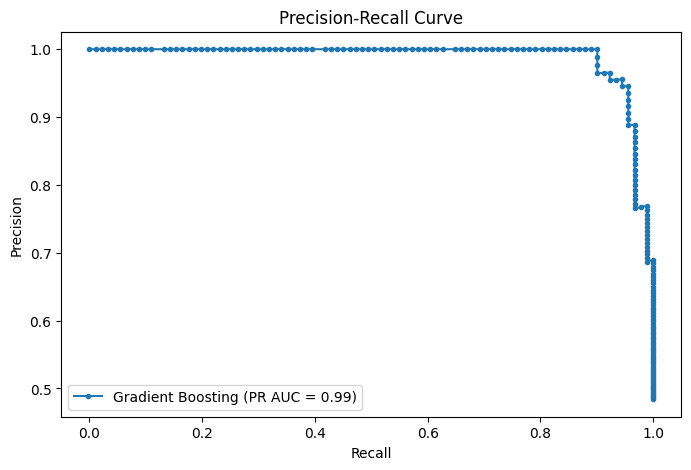

In [34]:
# Model Evaluation (Updated)
# Make Predictions
from sklearn.metrics import auc, precision_recall_curve

y_pred_proba = final_gb_model.predict_proba(X_test)[:, 1]  # Get probability scores

# Compute Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute Precision-Recall AUC
pr_auc = auc(recall, precision)
print("\nPrecision-Recall AUC Score:", pr_auc)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label="Gradient Boosting (PR AUC = {:.2f})".format(pr_auc))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


In [ ]:
# XGB 

%pip install xgboost

import xgboost as xgb

start_time = time.time()

# Define the pipeline with SMOTE and XGBoost Classifier
pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy="minority", random_state=42)),  
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Define parameter grid for XGBoost hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 300, 500],  # XGBoost typically needs more trees
    'classifier__learning_rate': [0.01, 0.1, 0.2],  
    'classifier__max_depth': [3, 5, 7],  
    'classifier__subsample': [0.7, 0.8, 0.9],  
    'classifier__colsample_bytree': [0.7, 0.8, 0.9],  # Column sampling for better generalization
    'classifier__min_child_weight': [1, 3, 5],  # Min weight of child nodes to reduce overfitting
    'classifier__gamma': [0, 0.1, 0.2],  # Minimum loss reduction required for further split
}

# Stratified K-Fold ensures class balance
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# HalvingGridSearchCV for hyperparameter tuning
search_start_time = time.time()
halving_search = HalvingGridSearchCV(
    pipeline, param_grid, cv=strat_kfold, scoring='f1',
    factor=3, n_jobs=-1, verbose=1
)

# Fit the model using HalvingGridSearchCV
halving_search.fit(X_train, y_train)
search_end_time = time.time()

# Get best hyperparameters
best_params = halving_search.best_params_

# Remove 'classifier__' prefix from best_params
best_params = {key.replace('classifier__', ''): value for key, value in best_params.items()}

# Increase `n_estimators` for final training
best_params['n_estimators'] = 500

# Define final XGBoost model with optimized parameters
final_xgb_model = Pipeline([
    ('smote', SMOTE(random_state=42)),  
    ('classifier', xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train the final model
training_start_time = time.time()
final_xgb_model.fit(X_train, y_train)
training_end_time = time.time()

# Evaluate final model on test set
evaluation_start_time = time.time()
final_accuracy = final_xgb_model.score(X_test, y_test)
evaluation_end_time = time.time()

# Total execution time
end_time = time.time()

# Print time statistics
print("\n⏳ Total Time Taken:", round(end_time - start_time, 2), "seconds")
print("🔍 Hyperparameter Tuning Time:", round(search_end_time - search_start_time, 2), "seconds")
print("🎯 Final Model Training Time:", round(training_end_time - training_start_time, 2), "seconds")
print("📊 Model Evaluation Time:", round(evaluation_end_time - evaluation_start_time, 2), "seconds")

# Print best parameters and final model performance
print("✅ Best Parameters:", best_params)
print("🎯 Final Model Accuracy:", final_accuracy)

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 15.4 MB/s eta 0:00:09
   - -------------------------------------- 4.2/124.9 MB 14.7 MB/s eta 0:00:09
   -- ------------------------------------- 7.9/124.9 MB 15.7 MB/s eta 0:00:08
   --- ------------------------------------ 11.3/124.9 MB 16.0 MB/s eta 0:00:08
   ---- ----------------------------------- 14.4/124.9 MB 15.8 MB/s eta 0:00:08
   ---- ----------------------------------- 15.5/124.9 MB 14.3 MB/s eta 0:00:08
   ----- ---------------------------------- 17.8/124.9 MB 13.6 MB/s eta 0:00:08
   ----- ---------------------------------- 18.6/124.9 MB 12.6 MB/s eta 0:00:09
   ------ --------------------------------- 20.7/124.9 MB 11.8 MB/s eta 0:00:09
   ------- -------------------------------- 22.3/124.9 MB 11.5 MB/s eta 0:00:09
   ------- -------------------------------- 24.1/124.9 MB 11.1 MB/s eta 0:00:10
   -------- ------------------------------- 25.7/124

In [38]:
# Make predictions on the test set
y_pred = final_xgb_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("📊 Classification Report:\n", report)

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        97
           1       0.94      0.92      0.93        91

    accuracy                           0.94       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188




Precision-Recall AUC Score: 0.9867094422130411


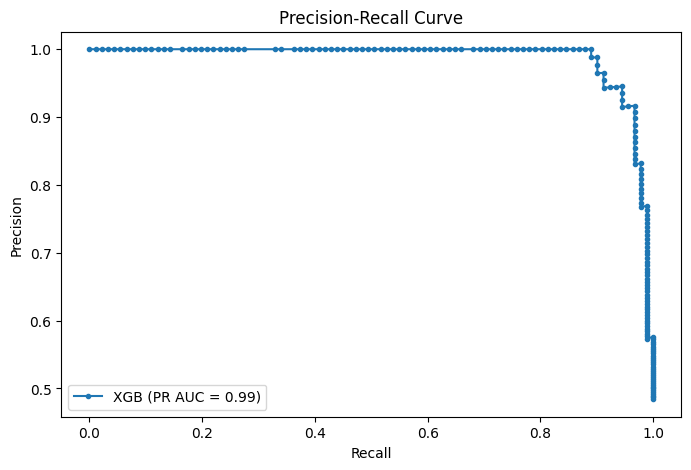

In [39]:
# Model Evaluation (Updated)
# Make Predictions
from sklearn.metrics import auc, precision_recall_curve

y_pred_proba = final_xgb_model.predict_proba(X_test)[:, 1]  # Get probability scores

# Compute Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Compute Precision-Recall AUC
pr_auc = auc(recall, precision)
print("\nPrecision-Recall AUC Score:", pr_auc)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.', label="XGB (PR AUC = {:.2f})".format(pr_auc))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
